In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
import numpy as np
import pandas as pd
import random

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt
%matplotlib inline


# Read data

In [30]:
df=pd.read_csv("DATA/Training.csv")
ts=pd.read_csv("DATA/Testing.csv")

In [31]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Analyze target (y) distribution

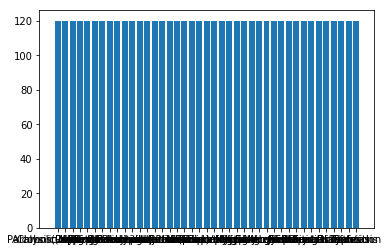

In [32]:
plt.bar(df.prognosis.value_counts().index, df.prognosis.value_counts())
plt.show()

# Pre-processing

In [33]:
#List of the symptoms
symptoms = list(df.columns)

# get the unique values
disease  = list(df.prognosis.drop_duplicates())
disease.sort()

# Remove the last item <<output>>
symptoms.pop(-1)




'prognosis'

In [34]:
print(len(symptoms),len(disease))

132 41


In [35]:
# convert classes to numeric 
df['prognosis'] = pd.factorize(df['prognosis'],sort=True)[0]
ts['prognosis'] = pd.factorize(ts['prognosis'],sort=True)[0]

In [36]:
print(df.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

# Train/Test Split

In [37]:
# Split data into  the inputs/output
X = df.iloc[:, : -1]
y = df.iloc[:, -1]
X_test = ts.iloc[:, : -1]
y_test = ts.iloc[:, -1]

# DecisionTreeClassifier,RandomForestClassifier,MultinomialNB,MLPClassifier,XGBClassifier

In [38]:
def decisionTree(X_train, y_train, X_test , y_test):
    # instantiate a Multinomial Naive Bayes model
    tr = tree.DecisionTreeClassifier()
    # train the model using X_train 
    tr.fit(X_train, y_train)
    # make class predictions for X_test
    y_pred_class = tr.predict(X_test)
    # calculate accuracy of class predictions
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    # the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
    
    
    return tr, accuracy, confusion_matrix

In [39]:
def randomForest(X_train, y_train, X_test , y_test):
    # instantiate a Multinomial Naive Bayes model
    rf = RandomForestClassifier()
    # train the model using X_train 
    rf.fit(X_train, y_train)
    # make class predictions for X_test
    y_pred_class = rf.predict(X_test)
    # calculate accuracy of class predictions
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    # the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
    
    
    return rf, accuracy, confusion_matrix

In [40]:
def naiveBayes(X_train, y_train, X_test , y_test):
    # instantiate a Multinomial Naive Bayes model
    nb = MultinomialNB()
    # train the model using X_train 
    nb.fit(X_train, y_train)
    # make class predictions for X_test
    y_pred_class = nb.predict(X_test)
    # calculate accuracy of class predictions
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    # the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
    
    
    return nb, accuracy, confusion_matrix
    

In [41]:
def MLP(X_train, y_train, X_test , y_test):
    # instantiate a MLPClassifier model
    mlp_clf = MLPClassifier(hidden_layer_sizes=(15, 10), alpha=3, learning_rate='adaptive', max_iter=100)
    # train the model using X_train 
    mlp_clf.fit(X_train, y_train)
    # make class predictions for X_test
    y_pred_class = mlp_clf.predict(X_test)
    # calculate accuracy of class predictions
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    # the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
    
    #print('Validation Accuracy = ', format(cross_val_score(mlp_clf, X_train, y_train, cv=5).mean(), '.2%'))
    
    return mlp_clf, accuracy, confusion_matrix

In [52]:
def XGBClassifier_(X_train, y_train, X_test , y_test):
    # instantiate a XGBClassifier model
    xgb_clf = XGBClassifier(num_class=41,
                                  learning_rate=0.1,
                                  max_depth=10,
                                  eval_metric='mlogloss')
    # train the model using X_train
    xgb_clf.fit(X_train, y_train)
    # make class predictions for X_test
    y_pred_class = xgb_clf.predict(X_test)
    # calculate accuracy of class predictions
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    # the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)

    return xgb_clf, accuracy, confusion_matrix

In [55]:

print("naiveBayes model")
clf1 , acc1 , cm = naiveBayes(X, y, X_test , y_test)
print(acc1,cm)

print("decisionTree model")
clf2 , acc2 , cm = decisionTree(X, y, X_test , y_test)
print(acc2,cm)

print("randomForest model")
clf3 , acc3 , cm = randomForest(X, y, X_test , y_test)
print(acc3,cm)

print("MLPClassifier model")
clf4 , acc4 , cm = MLP(X, y, X_test , y_test)
print(acc4,cm)

print("XGBClassifier  model")
clf5 , acc5 , cm = XGBClassifier_(X, y, X_test , y_test)
print(acc5,cm)


naiveBayes model
1.0 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
decisionTree model
1.0 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
randomForest model


C:\Users\hp\Conda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
MLPClassifier model


C:\Users\hp\Conda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hp\Conda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hp\Conda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hp\Conda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_it

Validation Accuracy =  100.00%
1.0 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
XGBClassifier  model
1.0 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [56]:
print("accuracy of all models is : {} %".format(((acc1+acc2+acc3+acc4+acc5)/5)*100))

accuracy of all models is : 100.0 %


# predict new data

In [63]:
# predict new data
#newData= [0] * len(symptoms)
#newData = [random.randint(0,1) for _ in range(len(symptoms))]
newData = ts.iloc[10, :-1]

newData = list(newData)
newData = np.reshape(newData,(1,-1))
l = []
# predict new data on all models we have
for m in [clf1,clf2,clf3,clf4,clf5]:
    l.append(m.predict(newData)[0])

In [64]:
l

[23, 23, 23, 23, 23]

In [65]:
# calculate predicted probabilitie for new data
proba = clf3.predict_proba(newData)
if np.amax(proba) > 0.5:
    print("This person is sick")
    print(disease[max(l,key=l.count)])
else:
    print("This person is good")

This person is sick
Hypertension 
